In [26]:

import numpy as np
import sklearn
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob
import os

# 常见的音频特征提取

## 过零率

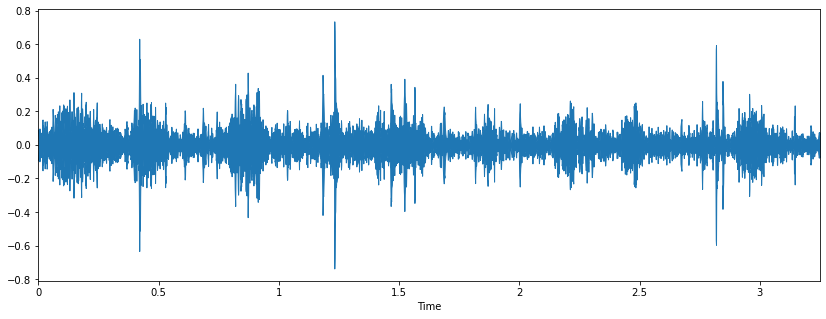

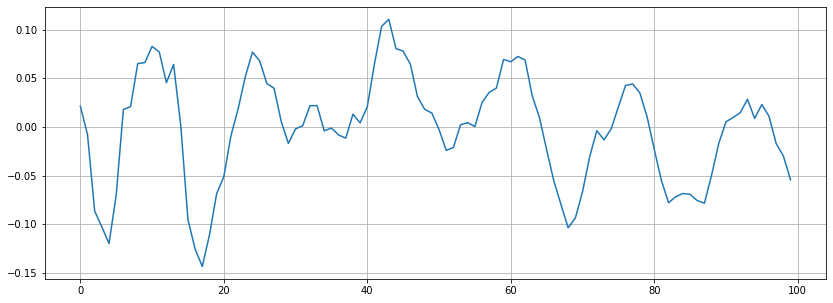

In [3]:
x, sr = librosa.load('../data/train_sample/aloe/24EJ22XBZ5.wav')
#绘制声波信号
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# 放大
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [4]:

# 计算过零率
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

15


## 频谱质心

谱质心(Spectral Centroid)是描述音色属性的重要物理参数之一，是频率成分的重心，是在一定频率范围内通过能量加权平均的频率，其单位是Hz。它是声音信号的频率分布和能量分布的重要信息。在主观感知领域，谱质心描述了声音的明亮度，具有阴暗、低沉品质的声音倾向有较多低频内容，谱质心相对较低，具有明亮、欢快品质的多数集中在高频，谱质心相对较高。该参数常用于对乐器声色的分析研究。

(140,)


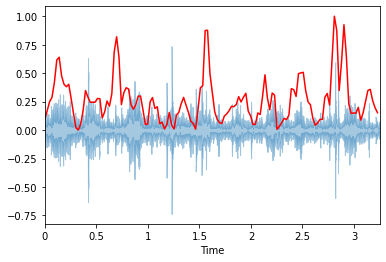

In [6]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)
# (2647,)
# 计算时间变量 
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# 归一化频谱质心
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#沿波形绘制频谱质心 
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## 声谱衰减

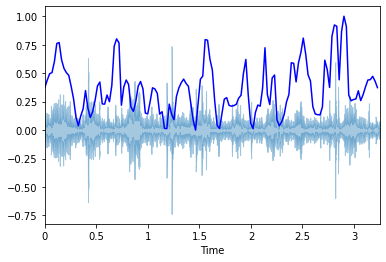

In [7]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='b')

## 色度频率

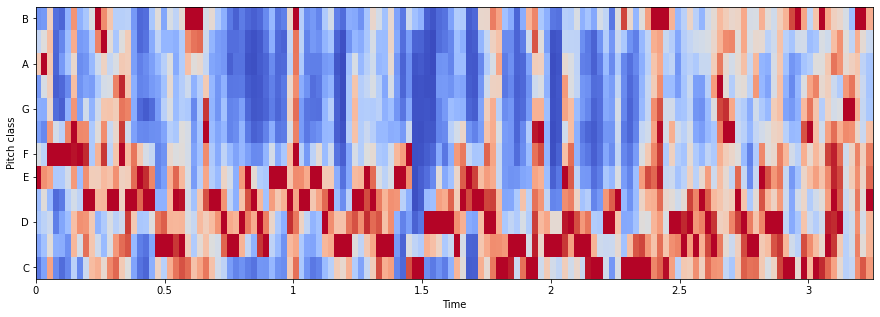

In [8]:

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# MFCC特征提取

## 短时傅里叶分析(STFT)

### 分帧

### 对每帧信号进行DFT

使用离散傅里叶变换(DFT)把每一帧信号变换到时域



In [13]:
# STFT
y, sr = librosa.load('../data/train_sample/aloe/24EJ22XBZ5.wav')
S =librosa.stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, pad_mode='reflect')
'''
• y：音频时间序列
• n_fft：FFT窗口大小，n_fft=hop_length+overlapping
• hop_length：帧移，如果未指定，则默认win_length / 4
• win_length：每一帧音频都由window()加窗。窗长win_length，然后用零填充以匹配n_fft
 默认win_length=n_fft。
• window：字符串，元组，数字，函数 shape =（n_fft, )
 窗口（字符串，元组或数字）
 窗函数，例如scipy.signal.hanning
 长度为n_fft的向量或数组
• center：bool
 如果为True，则填充信号y，以使帧 D [:, t]以y [t * hop_length]为中心
 如果为False，则D [:, t]从y [t * hop_length]开始
• dtype：D的复数值类型。默认值为64-bit complex复数
• pad_mode：如果center = True，则在信号的边缘使用填充模式
 默认情况下，STFT使用reflection padding
'''
S = np.abs(S)
print(y.shape)
print(S.shape)

(71661,)
(1025, 140)


# 梅尔频谱和梅尔倒谱

## 梅尔尺度（Mel Scale）

## 梅尔滤波器

## 梅尔倒谱



(20, 140)


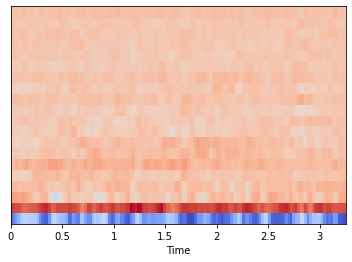

In [15]:

#梅尔频率倒谱系数 MFCC
mfccs = librosa.feature.mfcc(x, sr)
print (mfccs.shape)
# (20, 151)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 1.3623919e-08 -3.4059797e-09  6.8119594e-09 -6.8119594e-09
  3.4059797e-09 -1.3623919e-08  0.0000000e+00  1.3623919e-08
  6.8119594e-09  0.0000000e+00  3.4059797e-09 -4.6832223e-09
  1.3623919e-08 -1.3623919e-08  1.3623919e-08  1.5326910e-08
  5.1089697e-09  3.4059797e-09  0.0000000e+00  0.0000000e+00]
[1.         0.9999999  1.         1.         1.         1.
 1.0000002  1.0000001  1.         1.         1.         1.
 1.         1.0000001  1.         1.         1.         1.
 0.99999976 1.        ]


/home/yunwanx/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/yunwanx/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


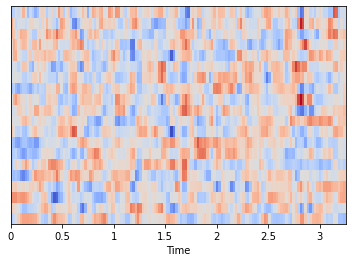

In [16]:

# mfcc 特征缩放
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# 本次任务中的特征提取

In [17]:
feature = []
label = []
# 建立类别标签，不同类别对应不同的数字。
label_dict = {'aloe': 0, 'burger': 1, 'cabbage': 2,'candied_fruits':3, 'carrots': 4, 'chips':5,
                  'chocolate': 6, 'drinks': 7, 'fries': 8, 'grapes': 9, 'gummies': 10, 'ice-cream':11,
                  'jelly': 12, 'noodles': 13, 'pickles': 14, 'pizza': 15, 'ribs': 16, 'salmon':17,
                  'soup': 18, 'wings': 19}
label_dict_inv = {v:k for k,v in label_dict.items()}

In [18]:
from tqdm import tqdm
def extract_features(parent_dir, sub_dirs, max_file=10, file_ext="*.wav"):
    c = 0
    label, feature = [], []
    for sub_dir in sub_dirs:
        for fn in tqdm(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))[:max_file]): # 遍历数据集的所有文件
            
           # segment_log_specgrams, segment_labels = [], []
            #sound_clip,sr = librosa.load(fn)
            #print(fn)
            label_name = fn.split('/')[-2]
            label.extend([label_dict[label_name]])
            X, sample_rate = librosa.load(fn,res_type='kaiser_fast')
            mels = np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0) # 计算梅尔频谱(mel spectrogram),并把它作为特征
            feature.extend([mels])
            
    return [feature, label]

In [25]:
parent_dir = '../data/train_sample/'
save_dir = "../output"
folds = sub_dirs = np.array(['aloe','burger','cabbage','candied_fruits',
                             'carrots','chips','chocolate','drinks','fries',
                            'grapes','gummies','ice-cream','jelly','noodles','pickles',
                            'pizza','ribs','salmon','soup','wings'])

# 获取特征feature以及类别的label
temp = extract_features(parent_dir,sub_dirs,max_file=100)

100%|██████████| 35/35 [00:03<00:00, 11.58it/s]


In [27]:

temp = np.array(temp)
data = temp.transpose()

In [28]:
# 获取特征
X = np.vstack(data[:, 0])

# 获取标签
Y = np.array(data[:, 1])
print('X的特征尺寸是：',X.shape)
print('Y的特征尺寸是：',Y.shape)

X的特征尺寸是： (1000, 128)
Y的特征尺寸是： (1000,)


In [33]:
from keras.utils.np_utils import to_categorical

In [34]:
# 在Keras库中：to_categorical就是将类别向量转换为二进制（只有0和1）的矩阵类型表示
Y = to_categorical(Y)

In [35]:

# 最终数据
print(X.shape)
print(Y.shape)

(1000, 128)
(1000, 20)


参考资料：
1. [STFT和声谱图](https://blog.csdn.net/qq_28006327/article/details/59129110?utm_source=blogxgwz9)
2. [MFCC特征提取教程](http://fancyerii.github.io/books/mfcc/)
3. [librosa处理音频信号](https://render.githubusercontent.com/view/42690?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161605127816780265442243%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161605127816780265442243&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-3-103542690.pc_search_result_no_baidu_js&utm_term=librosa+stft)